# DSS

In [11]:
import sys, collections, os
import sys, collections, os
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr  
import numpy as np
sns.set()
import pprint as pp
import math
from matplotlib import pyplot as plt

In [5]:
from tf.fabric import Fabric
XBIB = 'hebrew/extrabiblical'
TF = Fabric(locations='~/github/text-fabric-data', modules=[XBIB])
api = TF.load('''
    otype lex language
    typ code function rela det 
    vt vs txt sp mother uvf
''')

This is Text-Fabric 4.3.0
Api reference : https://dans-labs.github.io/text-fabric/Api/General/
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

72 features found and 0 ignored
  0.00s loading features ...
   |     0.00s B otype                from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.01s B lex                  from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.01s B language             from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.02s B typ                  from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.00s B code                 from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.01s B function             from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.02s B rela                 from /Users/jAir/github/text-fabric-data/hebrew/extrab

In [6]:
api = TF.load('''
    otype lex language
    typ code function rela det 
    vt vs txt sp mother uvf
''')

  0.00s loading features ...
  0.03s All features loaded/computed - for details use loadLog()


In [7]:
api.loadLog()
api.makeAvailableIn(globals())

   |     0.03s M otext                from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.00s B otype                from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.05s B oslots               from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.00s M otext                from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.02s B book                 from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.00s B chapter              from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.00s B verse                from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.01s B g_cons               from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.01s B g_lex_utf8           from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical
   |     0.01s B g_suffix             from /Users/jAir/github/text-fabric-data/hebrew/extrabiblical


In [8]:
sentence_list = []
sentence_dict = {}

number_clauses = []
number_words = []
clause_word_ratio = []

for sen in F.otype.s('sentence'):
    clauses = L.d(sen, 'clause')
    cl_counter = 0
    
    for cl in clauses:
        cl_counter += 1
        
    all_words = L.d(sen, 'word')
    word_counter = 0
    
    for w in all_words:  
        word_counter += 1
        
    info_list = [str(cl)]
    
    where = T.sectionFromNode(cl)
    for elem in where:
        info_list.append(str(elem))
    words = L.d(cl, 'word')
    lang = F.language.v(words[0])
    info_list.append(lang)
    info_list.append(str(cl_counter))
    number_clauses.append(cl_counter)
    info_list.append(str(word_counter))
    number_words.append(word_counter)
    info_list.append(str(word_counter / cl_counter))
    clause_word_ratio.append(word_counter / cl_counter)
    
    sentence_list.append(cl)
    sentence_dict[cl] = info_list

In [9]:
csvh = open('sentence_jarodwords_dss.csv', "w")
header = ['id', 'book', 'chapter', 'verse', 'language', 'sentence_length', 'number_words', 'clause_length']
csvh.write('{}\n'.format(','.join(header)))
for sen in sentence_list:
    line = sentence_dict[sen]
    csvh.write('{}\n'.format(','.join(line)))
    
csvh.close()

In [12]:
sen_len = pd.read_csv('/Users/jAir/Desktop/ipynb/sentence_jarodwords_dss.csv')

In [13]:
sen_len.head(10)

,id,book,chapter,verse,language,sentence_length,number_words,clause_length
0,13921,1QM,1,1,Hebrew,1,3,3.000000
1,13923,1QM,1,2,Hebrew,2,30,15.000000
2,13926,1QM,1,3,Hebrew,3,7,2.333333
3,13931,1QM,1,4,Hebrew,3,28,9.333333
4,13928,1QM,1,4,Hebrew,1,1,1.000000
5,13929,1QM,1,4,Hebrew,1,4,4.000000
6,13932,1QM,1,5,Hebrew,1,7,7.000000
7,13933,1QM,1,5,Hebrew,1,4,4.000000
8,13935,1QM,1,6,Hebrew,2,14,7.000000
9,13938,1QM,1,6,Hebrew,3,10,3.333333


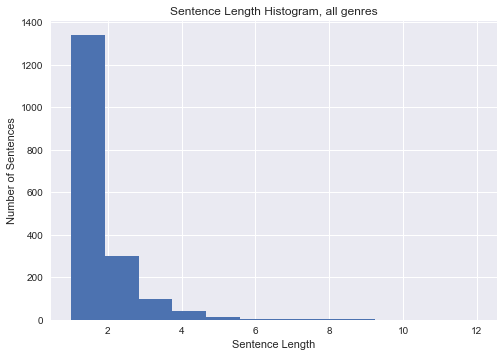

In [14]:
sen_len.hist(column = 'sentence_length', bins = (sen_len['sentence_length'].max()))
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Sentence Length Histogram, all genres')
plt.show()

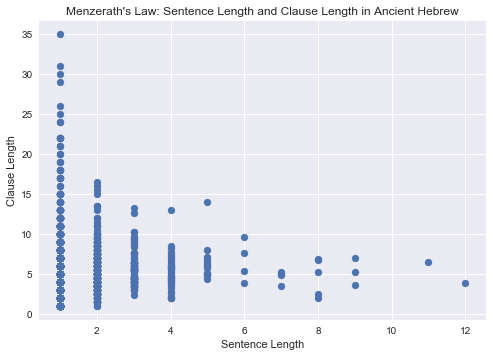

In [15]:
plt.scatter(sen_len.sentence_length, sen_len.clause_length)
plt.title("Menzerath's Law: Sentence Length and Clause Length in Ancient Hebrew")
plt.xlabel("Sentence Length")
plt.ylabel("Clause Length")
plt.show()

In [25]:
sen_len.groupby('sentence_length').sentence_length.count()

sentence_length
1     1339
2      300
3       99
4       39
5       15
6        4
7        4
8        5
9        3
11       1
12       1
Name: sentence_length, dtype: int64

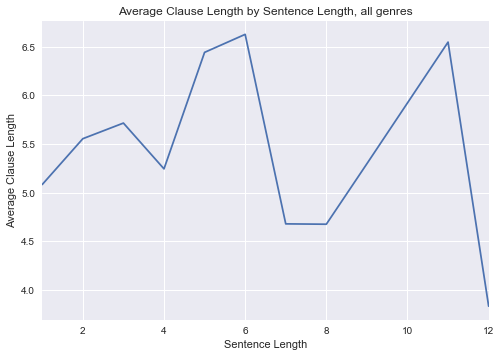

In [16]:
sen_len.clause_length.groupby(sen_len.sentence_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length, all genres')
plt.show()

In [27]:
sen_len_1QM = sen_len[sen_len['book'] == '1QM']
sen_len_1QM.groupby('sentence_length').sentence_length.count()

sentence_length
1    759
2    133
3     36
4     16
5      3
7      1
8      3
9      2
Name: sentence_length, dtype: int64

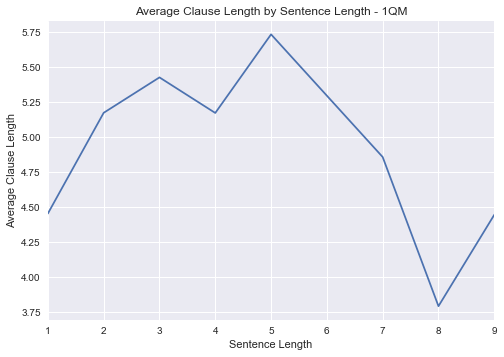

In [30]:
sen_len_1QM.clause_length.groupby(sen_len_1QM.sentence_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length - 1QM')
plt.show()

In [28]:
sen_len_1QS = sen_len[sen_len['book'] == '1QS']
sen_len_1QS.groupby('sentence_length').sentence_length.count()

sentence_length
1     306
2     124
3      53
4      22
5      11
6       4
7       3
8       2
9       1
11      1
12      1
Name: sentence_length, dtype: int64

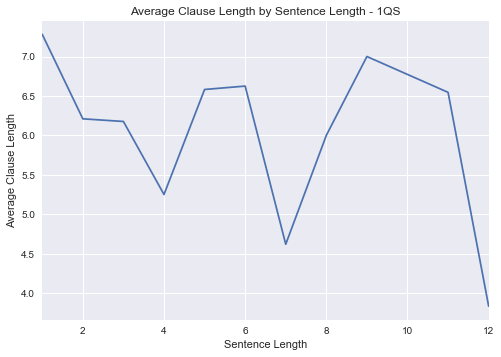

In [29]:
sen_len_1QS.clause_length.groupby(sen_len_1QS.sentence_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length - 1QS')
plt.show()